In [12]:
import pandas as pd
df = pd.read_csv('data/CLRTAP_NVFR14_V21_GF.csv', sep='\t')


# ref : https://github.com/ResidentMario/missingno

<AxesSubplot:>

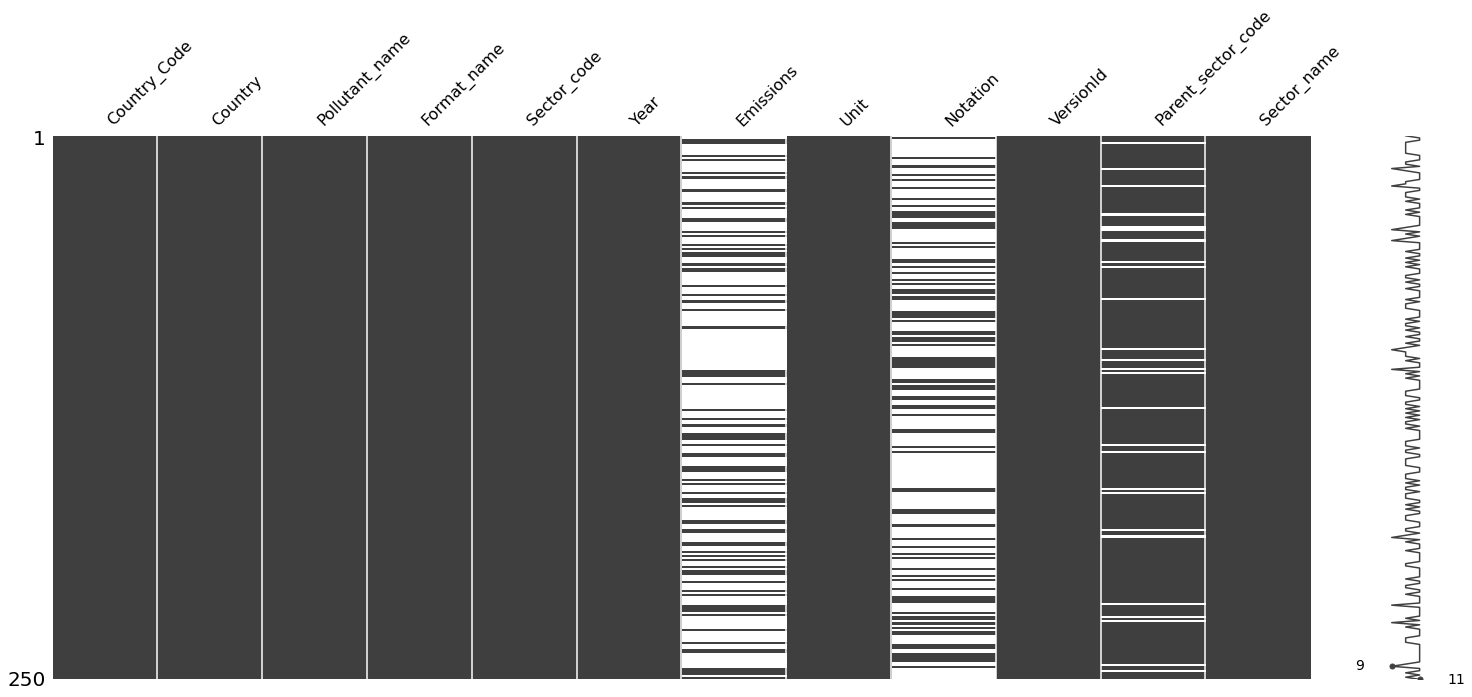

In [8]:
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

msno.matrix(df.sample(250))

<AxesSubplot:>

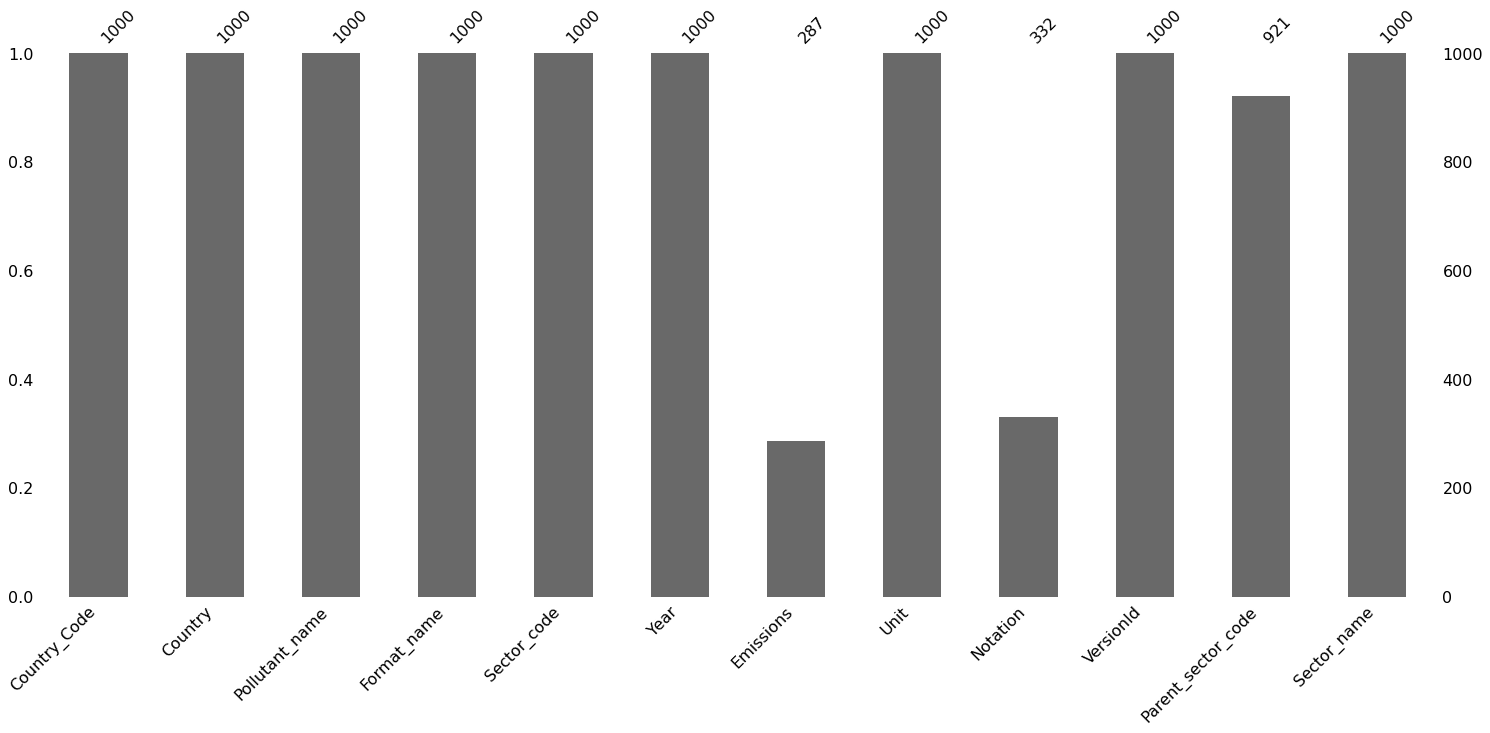

In [9]:
msno.bar(df.sample(1000))

<AxesSubplot:>

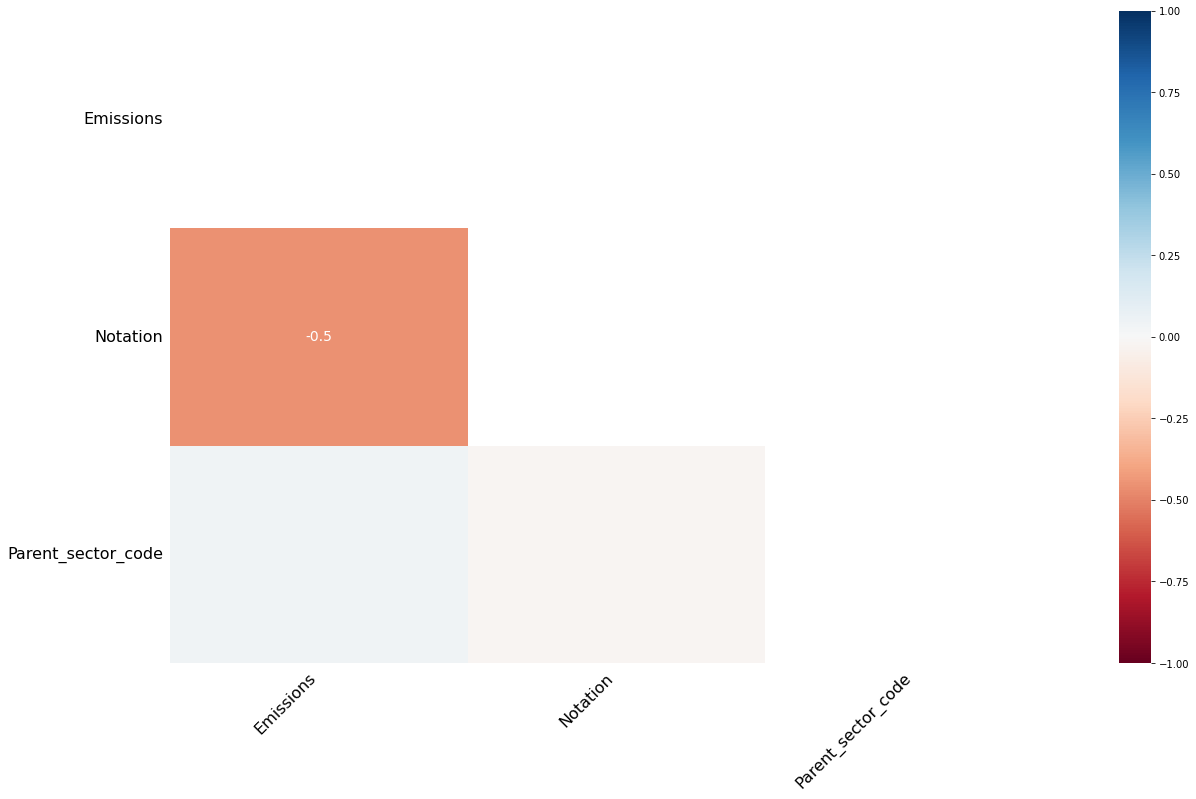

In [10]:
msno.heatmap(df)

In [13]:
import numpy as np

# df is a pandas.DataFrame instance
df = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]
corr_mat = df.isnull().corr()

<AxesSubplot:>

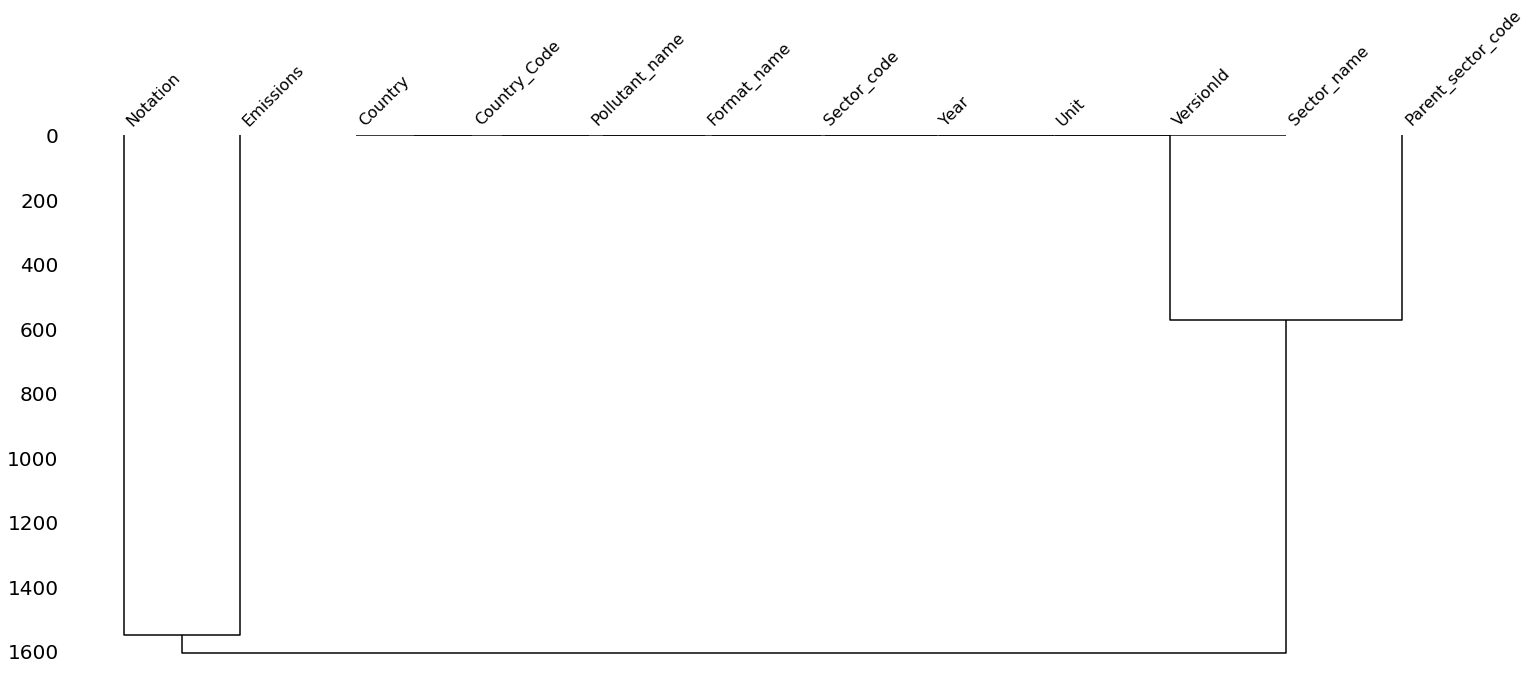

<AxesSubplot:>

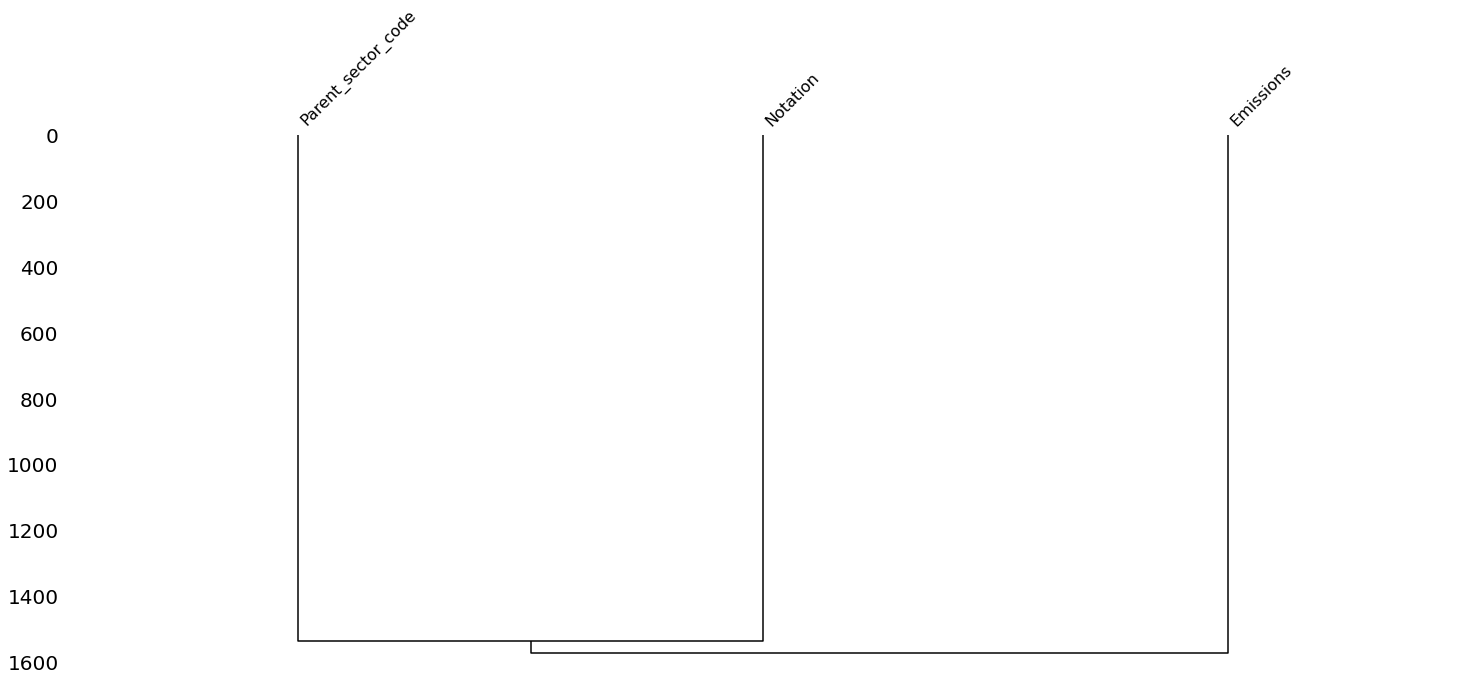

In [15]:
msno.dendrogram(df)